In [1]:
%cd /Users/monica_air/Documents/GitHub/Sign_recognition/py

/Users/monica_air/Documents/GitHub/Sign_recognition/py


In [2]:
from machine_learning import *
from basic_preprocessing import *

### Data load

In [3]:
data_path = '/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/'

In [4]:
a=   get_file_list(data_path)
a=a[1:]
a

['/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/fragile',
 '/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/handle',
 '/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/up',
 '/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/wet']

In [5]:
categories = ['fragile', 'handle', 'up', 'wet']

In [6]:
def data_for_ml (categories, data_path, num):
    data = []
    img_path=[]
    

    for category in categories:
        file_path = os.path.join(data_path, category)
        print(file_path)
        label = categories.index(category)

        for img in os.listdir(file_path):
            imgpath = os.path.join(file_path, img)
            img_path.append(imgpath)

            try: 
                pet_img = cv2.imread(imgpath, cv2.IMREAD_COLOR)
                pet_img = cv2.cvtColor(pet_img, cv2.COLOR_BGR2RGB)
                pet_img = cv2.resize(pet_img, (num, num))

                images = np.array(pet_img).flatten()

                data.append([images, label])

            except Exception as e:
                pass

    print('data수: ', len(data))
    return data, img_path, label


In [7]:
data, img_path, label = data_for_ml(categories, data_path, 200)

/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/fragile
/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/handle
/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/up
/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/wet
data수:  613


In [8]:
features, labels = feature_label_maker(data)

features:  613
features ex:  [238 238 238 ... 240 240 240]
feature shape:  (120000,)
-----------------------------
labels:  613
labels ex:  0
labels shape:  (120000,)


In [9]:
for num, i in enumerate (img_path):
    i = i.split('/')[-1]
#     print(i)
    if i =='.DS_Store':
        print(num)

37
257
365
523


In [10]:
img_path[37]

'/Users/monica_air/Documents/Sign recognition/Dataset/[cleaned] Raw total/fragile/.DS_Store'

In [11]:
del img_path[37]
del img_path[257]
del img_path[365]
del img_path[523]

In [12]:
print(len(img_path))
print(len(labels))
print(len(features))

613
613
613


In [13]:
feature_names = []
for num, i in enumerate (img_path):
    i = i.split('/')[-1]
    feature_names.append(i)
    
feature_names[2]

'fragile_resized_77.jpg'

In [14]:
img_infos = pd.DataFrame({'feature_names':feature_names, 'label':labels})

In [15]:
cd /Users/monica_air/Documents/Sign recognition

/Users/monica_air/Documents/Sign recognition


In [16]:
img_infos.to_csv('[0921]sign_recognition.csv')

In [17]:
for i in categories:
    img_paths = data_path+i
    print(i, count_img(img_paths))

이미지 수 247
fragile None
이미지 수 96
handle None
이미지 수 159
up None
이미지 수 115
wet None


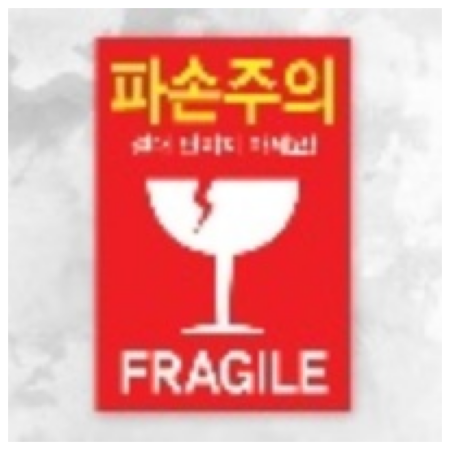

fragile


In [18]:
for_test = features[0]
for_test_img = for_test.reshape(200,200,3)
show(for_test_img)
print(categories[labels[0]])

### train_test_split

In [19]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, KFold

In [20]:
# test index 겹치지 않음
# Therefore, in classifications tasks with imbalanced class distributions, we should prefer StratifiedKFold over KFold.

skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle=True)

In [21]:
skf.get_n_splits(features, labels)
print(skf)

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


In [22]:
train_index, test_index = next(skf.split(features, labels))
X_train, X_test = features[train_index], features[test_index]
y_train, y_test = labels[train_index], labels[test_index]

In [23]:
train_index[20]

26

In [24]:
feature_names[26]

'fragile_resized_226.jpg'

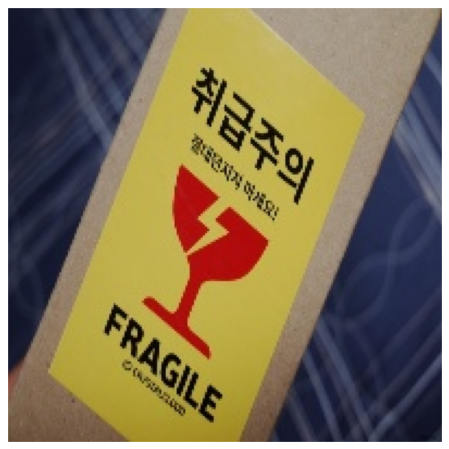

In [25]:
jpg = X_train[20].reshape(200,200,3)
show(jpg)

### save images

In [27]:
train_img_list = []
for i in train_index:
    train_img_list.append(img_path[i])

    
test_img_list = []
for i in test_index:
    test_img_list.append(img_path[i])

In [31]:
cd /Users/monica_air/Documents/Sign recognition/Dataset/Stratified/test

/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/test


In [34]:
/pwd

'/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/train'

In [32]:
os.mkdir('fragile')
os.mkdir('handle')
os.mkdir('wet')
os.mkdir('up')

In [33]:
fragile_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/train/fragile'
handle_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/train/handle'
wet_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/train/wet'
up_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/train/up'

In [35]:
#test
fragile_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/test/fragile'
handle_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/test/handle'
wet_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/test/wet'
up_dst= '/Users/monica_air/Documents/Sign recognition/Dataset/Stratified/test/up'

In [36]:
import shutil
import os


for i in test_img_list:
    try:
        if 'fragile' in i:
            shutil.copy(i, fragile_dst)
        elif 'handle' in i:
            shutil.copy(i, handle_dst)
        elif 'wet' in i:
            shutil.copy(i, wet_dst)
        elif 'up' in i:
            shutil.copy(i, up_dst)
    except:
        print(i)